In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns = ['성별','인종','부모교육수준','점심','시험준비과정','수학점수','독서점수','쓰기점수']

In [5]:
df.head()

,성별,인종,부모교육수준,점심,시험준비과정,수학점수,독서점수,쓰기점수
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      1000 non-null   object
 1   인종      1000 non-null   object
 2   부모교육수준  1000 non-null   object
 3   점심      1000 non-null   object
 4   시험준비과정  1000 non-null   object
 5   수학점수    1000 non-null   int64 
 6   독서점수    1000 non-null   int64 
 7   쓰기점수    1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df['평균'] = (df.수학점수 + df.독서점수 + df.쓰기점수)/3

In [8]:
df.loc[df.평균 >= 90,'등급'] = 'A'
df.loc[(df.평균 >= 80)&(df.평균 < 90),'등급'] = 'B'
df.loc[(df.평균 >= 70)&(df.평균 < 80),'등급'] = 'C'
df.loc[(df.평균 >= 60)&(df.평균 < 70),'등급'] = 'D'
df.loc[(df.평균 >= 50)&(df.평균 < 60),'등급'] = 'E'
df.loc[df.평균 < 50,'등급'] = 'F'

In [9]:
df.head(100)

,성별,인종,부모교육수준,점심,시험준비과정,수학점수,독서점수,쓰기점수,평균,등급
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C
...,...,...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82,80.333333,B
96,male,group B,some high school,standard,completed,65,66,62,64.333333,D
97,female,group E,some college,standard,completed,63,72,70,68.333333,D
98,female,group D,some college,free/reduced,none,58,67,62,62.333333,D


In [10]:
df.부모교육수준.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
df.수학점수.unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [17]:
df.describe()

,수학점수,독서점수,쓰기점수,평균
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


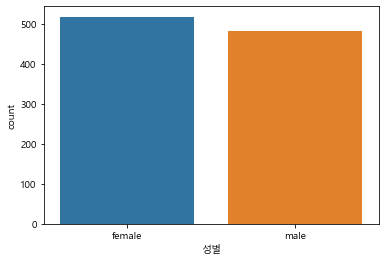

In [12]:
sns.countplot(df.성별)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


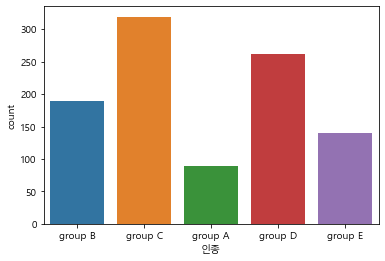

In [13]:
sns.countplot(df.인종)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '성별&등급')

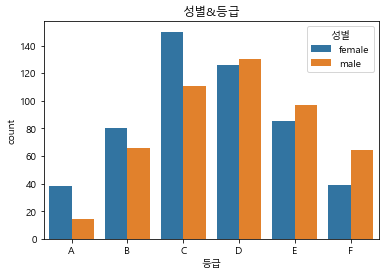

In [14]:
sns.countplot(df.등급, hue=df.성별, order=['A','B','C','D','E','F'])
plt.title('성별&등급')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '인종&등급')

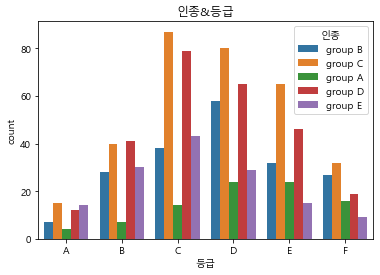

In [15]:
sns.countplot(df.등급, hue=df.인종, order=['A','B','C','D','E','F'])
plt.title('인종&등급')

Text(0.5, 1.0, '수학점수&독서점수&성별')

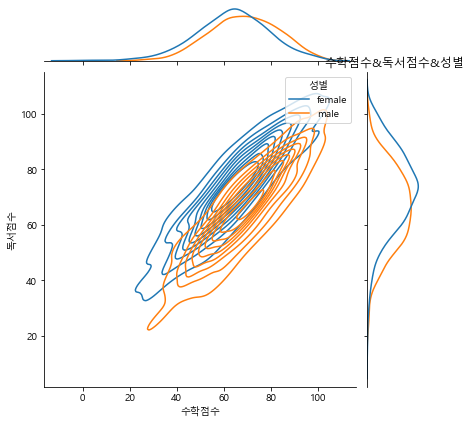

In [25]:
sns.jointplot(data=df, x='수학점수', y='독서점수', hue='성별', kind='kde')
plt.title('수학점수&독서점수&성별')

Text(0.5, 1.0, '평균&시험준비과정')

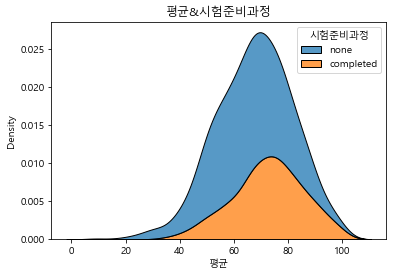

In [24]:
sns.kdeplot(data=df, x="평균", hue="시험준비과정", multiple="stack")
plt.title('평균&시험준비과정')

Text(0.5, 1.0, '평균&점심')

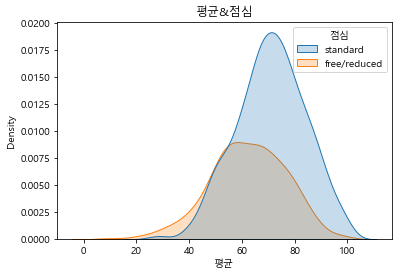

In [23]:
sns.kdeplot(data=df, x="평균", hue="점심", multiple="layer",fill=True)
plt.title('평균&점심')

Text(0.5, 1.0, '평균&부모교육수준')

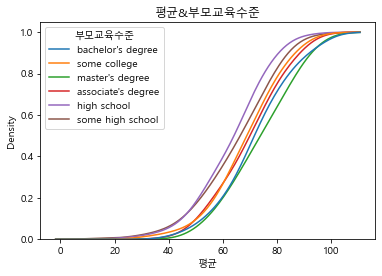

In [22]:
sns.kdeplot(data=df, x="평균", hue="부모교육수준",cumulative=True, common_norm=False, common_grid=True,)
plt.title('평균&부모교육수준')